<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Deep_Learning_with_PyTorch_01_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch - Chapteer 01
A simple Regression Problem



code examples from https://github.com/dvgodoy/PyTorchStepByStep/blob/master/Chapter01.ipynb

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn


In [ ]:
# Install torchviz from git repository
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-qt54fyt_
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-qt54fyt_
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=4d855466207f7a2cea1b1157b805b832eaabaa84ea2201d2da55c916b3742c04
  Stored in directory: /tmp/pip-ephem-wheel-cache-8eoaw3ue/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [ ]:
from torchviz import make_dot

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
true_b = 1
true_w = 2

n= 100

#random data generation
np.random.seed(42)
x = np.random.rand(n,1)

e = (0.1 * np.random.randn(n,1))

# linear equation
y = true_b + true_w * x + e

In [ ]:
idx = np.arange(n)
np.random.shuffle(idx)

In [ ]:
train_idx = idx[:int(n*0.8)]
val_idx = idx[int(n*0.8):]

In [ ]:
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

(<Figure size 1152x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b99d026d0>,
       dtype=object))

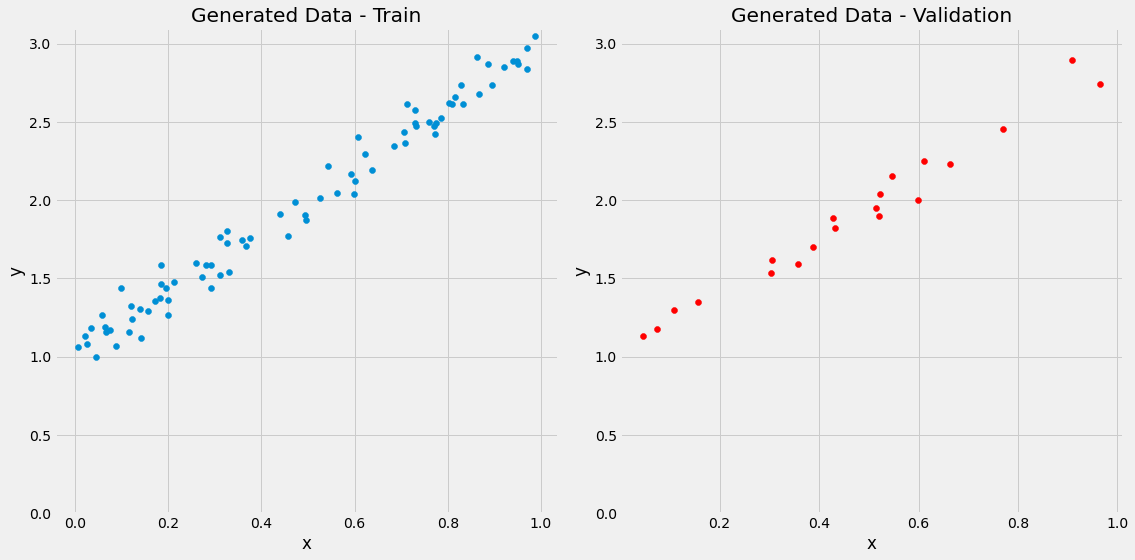

In [ ]:
figure1(x_train, y_train, x_val, y_val)

# step 0 --> random initialization

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

[0.49671415] [-0.1382643]


# step 1 --> model's prediction

In [ ]:
yhat = b + w * x_train
yhat[0:5]

array([[0.390075  ],
       [0.4879263 ],
       [0.37737776],
       [0.4931996 ],
       [0.39550552]])

# step 2 --> compute the loss

In [ ]:
error = (yhat-y_train)

In [ ]:
loss = (error **2).mean()
loss

2.7421577700550976

# step 3 --> compute the gradients

In [ ]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train*error).mean()
b_grad,w_grad

(-3.044811379650508, -1.8337537171510832)

# step 4 --> updat the parameters

In [ ]:
lr = 0.1
print(b, w)

b = b -lr * b_grad
w = w- lr * w_grad
print(b,w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


# using a function and Numpy

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b + w * x_train

  error = (yhat - y_train)
  loss = (error ** 2 ).mean()

  b_grad = 2 * error.mean()
  w_grad = 2 * (x_train * error).mean()

  b = b - lr * b_grad
  w = w - lr * w_grad

print(b,w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [ ]:
def fit_model(x_train, y_train):
    # Fits a linear regression to find the actual b and w that minimize the loss
    regression = LinearRegression()
    regression.fit(x_train, y_train)
    b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]
    return b_minimum, w_minimum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


Text(0.01, 1.5, 'b = 1.0235 w = 1.9690')

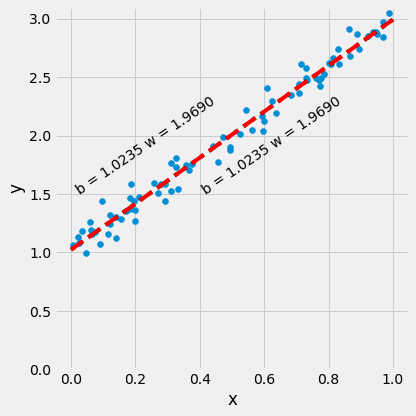

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])

# Dataset
ax.scatter(x_train, y_train)
fig.tight_layout()

x_range = np.linspace(0, 1, 101)

regression = LinearRegression()
regression.fit(x_train, y_train)
b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]

yhat_range = b_minimum + w_minimum * x_range
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle=':')
ax.annotate('b = {:.4f} w = {:.4f}'.format(b_minimum, w_minimum), xy=(.4, 1.5), c='k', rotation=34)

yhat_pred = b + w * x_range
ax.plot(x_range, yhat_pred, label='Final model\'s predictions', c='k', linestyle='--',color='r')
ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.01, 1.5), c='k', rotation=34,color='r')

# PyTorch

In [ ]:
scalar = torch.tensor(1.1234)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2,3), dtype = torch.float)
tensor = torch.randn((2,3,4),dtype = torch.float)

In [ ]:
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(1.1234)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.1491,  1.7125,  1.3410,  0.4310],
         [ 0.7811,  0.3117,  1.0211,  0.7458],
         [-2.1914,  1.0255, -2.8228, -0.5445]],

        [[-0.0727, -0.9524,  1.0408, -1.6469],
         [ 0.5589,  0.2507,  0.4981, -1.0039],
         [-2.4088, -0.8584,  1.0482,  1.0471]]])


# convert numpy to tensor 

In [ ]:
x_train_tensor = torch.as_tensor(x_train)

In [ ]:
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [ ]:
x_train.shape, x_train_tensor.shape

((80, 1), torch.Size([80, 1]))

In [ ]:
dummy_array = np.array([1,2,3])
dummy_tensor = torch.as_tensor(dummy_array)
dummy_array

array([1, 2, 3])

In [ ]:
dummy_tensor

tensor([1, 2, 3])

In [ ]:
dummy_array[0]=5
dummy_tensor

tensor([5, 2, 3])